In [11]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [12]:
#read the data
studentInfo = pd.read_csv('studentInfo.csv')
vle = pd.read_csv("studentVle.csv")

In [13]:
#MODIFICATIONS
#studentinfo
# removing empty fields
nan_value = float("NaN")
studentInfo.replace("", nan_value, inplace=True)
studentInfo.dropna(subset = list(studentInfo.columns), inplace=True)
studentInfo.dropna(subset = ['final_result'], inplace=True)
# remove withdrawn
studentInfo = studentInfo.drop(studentInfo[studentInfo.final_result == 'Withdrawn'].index)
# distinction = pass
studentInfo.loc[studentInfo.final_result == 'Distinction', ['final_result']] = 'Pass'
#strings values chaning to integers
encoder = LabelEncoder()
studentInfo['gender_code'] = encoder.fit_transform(studentInfo['gender'])
studentInfo['highest_education_code'] = encoder.fit_transform(studentInfo['highest_education'])
studentInfo['region_code'] = encoder.fit_transform(studentInfo['region'])
studentInfo['final_result_code'] = encoder.fit_transform(studentInfo['final_result'])
#vle
ordered = vle.groupby(["id_student", "date"], as_index=False).sum('sum_click')
ordered['clicks_divided_by_max'] = ordered['sum_click']/ordered['sum_click'].max()
ordered = pd.merge(ordered, studentInfo, on='id_student', how='left')
nan_value = float("NaN")
ordered.replace("", nan_value, inplace=True)
ordered.dropna(subset = list(ordered.columns), inplace=True)
ordered.dropna(subset = ['final_result_code'], inplace=True)

In [14]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

In [15]:
#STUDENTINFO 
#testing and training lists
X = studentInfo[['highest_education_code', 'region_code','gender_code']] 
y = studentInfo.final_result_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Decision Tree
clfdecision = clfdecision.fit(X_train,y_train)
y_pred = clfdecision.predict(X_test)
print('studentinfo decision tree')
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Random forest
clfrandom = clfrandom.fit(X_train,y_train)
y_pred_random=clfrandom.predict(X_test)
print('student info random forest')
print("F1:",metrics.f1_score(y_test, y_pred_random))
print("Precision:",metrics.precision_score(y_test, y_pred_random))
print("Recall:",metrics.recall_score(y_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))
# Logistic Regression #
clflogistic = clflogistic.fit(X_train,y_train)
y_pred_logistic=clflogistic.predict(X_test)
print('student info logistic regression')
print("F1:",metrics.f1_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))
# SVM #
clfsvc = clfsvc.fit(X_train,y_train)
y_pred_svm = clfsvc.predict(X_test)
print('student info svc')
print("F1:",metrics.f1_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

In [16]:
#DAILY ACTIVITY normalized
X_daily_normalized = ordered[['id_student', 'date','clicks_divided_by_max']]
y_daily_normalized = ordered.final_result_code 
X_daily_normalized_train, X_daily_normalized_test, y_daily_normalized_train, y_daily_normalized_test = train_test_split(X_daily_normalized, y_daily_normalized, test_size=0.3, random_state=1)

#Decision tree
clfdecision = clfdecision.fit(X_daily_normalized_train,y_daily_normalized_train)
y_pred = clfdecision.predict(X_daily_normalized_test)
print('daily normalized decision')
print("F1:",metrics.f1_score(y_daily_normalized_test, y_pred))
print("Precision:",metrics.precision_score(y_daily_normalized_test, y_pred))
print("Recall:",metrics.recall_score(y_daily_normalized_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_daily_normalized_test, y_pred))
#Random forest
clfrandom = clfrandom.fit(X_daily_normalized_train,y_daily_normalized_train)
y_pred_random = clfrandom.predict(X_daily_normalized_test)
print('daily normalized random')
print("F1:",metrics.f1_score(y_daily_normalized_test, y_pred_random))
print("Precision:",metrics.precision_score(y_daily_normalized_test, y_pred_random))
print("Recall:",metrics.recall_score(y_daily_normalized_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_daily_normalized_test, y_pred_random))
#Logistic regression workin
clflogistic = clflogistic.fit(X_daily_normalized_train,y_daily_normalized_train)
y_pred_logistic = clflogistic.predict(X_daily_normalized_test)
print('daily normalized logistic')
print("F1:",metrics.f1_score(y_daily_normalized_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_daily_normalized_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_daily_normalized_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_daily_normalized_test, y_pred_logistic))
#SVM
clfsvc = clfsvc.fit(X_daily_normalized_train,y_daily_normalized_train)
y_pred = clfsvc.predict(X_daily_normalized_test)
print('daily normalized svm')
print("F1:",metrics.f1_score(y_daily_normalized_test, y_pred))
print("Precision:",metrics.precision_score(y_daily_normalized_test, y_pred))
print("Recall:",metrics.recall_score(y_daily_normalized_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_daily_normalized_test, y_pred))

In [17]:
#DAILY ACTIVITY actual count
X_daily_actual = ordered[['id_student', 'date','sum_click']]
y_daily_actual = ordered.final_result_code 
X_daily_actual_train, X_daily_actual_test, y_daily_actual_train, y_daily_actual_test = train_test_split(X_daily_actual, y_daily_actual, test_size=0.3, random_state=1)

# Decision Tree 
clfdecision = clfdecision.fit(X_daily_actual_train,y_daily_actual_train)
y_pred = clfdecision.predict(X_daily_actual_test)
print('daily actual decision')
print("F1:",metrics.f1_score(y_daily_actual_test, y_pred))
print("Precision:",metrics.precision_score(y_daily_actual_test, y_pred))
print("Recall:",metrics.recall_score(y_daily_actual_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_daily_actual_test, y_pred))
# Random forest
clfrandom = clfrandom.fit(X_daily_actual_train,y_daily_actual_train)
y_pred_random = clfrandom.predict(X_daily_actual_test)
print('daily actual random')
print("F1:",metrics.f1_score(y_daily_actual_test, y_pred_random))
print("Precision:",metrics.precision_score(y_daily_actual_test, y_pred_random))
print("Recall:",metrics.recall_score(y_daily_actual_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_daily_actual_test, y_pred_random))
# Logistic regression 
clflogistic = clflogistic.fit(X_daily_actual_train,y_daily_actual_train)
y_pred_logistic = clflogistic.predict(X_daily_actual_test)
print('daily actual logistic')
print("F1:",metrics.f1_score(y_daily_actual_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_daily_actual_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_daily_actual_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_daily_actual_test, y_pred_logistic))
# SVM
clfsvc = clfsvc.fit(X_daily_actual_train,y_daily_actual_train)
y_pred = clfsvc.predict(X_daily_actual_test)
print('daily actual svm')
print("F1:",metrics.f1_score(y_daily_actual_test, y_pred))
print("Precision:",metrics.precision_score(y_daily_actual_test, y_pred))
print("Recall:",metrics.recall_score(y_daily_actual_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_daily_actual_test, y_pred))

In [18]:
#STUDENTINFO & DAILY ACTIVITY normalized
X_studdaily_normalized = ordered[['id_student','highest_education_code', 'region_code','gender_code','date','clicks_divided_by_max']]
y_studdaily_normalized = ordered.final_result_code 
X_studdaily_normalized_train, X_studdaily_normalized_test, y_studdaily_normalized_train, y_studdaily_normalized_test = train_test_split(X_studdaily_normalized, y_studdaily_normalized, test_size=0.3, random_state=1)

#Decision tree
clfdecision = clfdecision.fit(X_studdaily_normalized_train,y_studdaily_normalized_train)
y_pred = clfdecision.predict(X_studdaily_normalized_test)
print('studdaily normalized decision')
print("F1:",metrics.f1_score(y_studdaily_normalized_test, y_pred))
print("Precision:",metrics.precision_score(y_studdaily_normalized_test, y_pred))
print("Recall:",metrics.recall_score(y_studdaily_normalized_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_studdaily_normalized_test, y_pred))
#Random forest
clfrandom = clfrandom.fit(X_studdaily_normalized_train,y_studdaily_normalized_train)
y_pred_random = clfrandom.predict(X_studdaily_normalized_test)
print('studdaily normalized random')
print("F1:",metrics.f1_score(y_studdaily_normalized_test, y_pred_random))
print("Precision:",metrics.precision_score(y_studdaily_normalized_test, y_pred_random))
print("Recall:",metrics.recall_score(y_studdaily_normalized_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_studdaily_normalized_test, y_pred_random))
#Logistic regression workin
clflogistic = clflogistic.fit(X_studdaily_normalized_train,y_studdaily_normalized_train)
y_pred_logistic = clflogistic.predict(X_studdaily_normalized_test)
print('studdaily normalized logistic')
print("F1:",metrics.f1_score(y_studdaily_normalized_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_studdaily_normalized_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_studdaily_normalized_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_studdaily_normalized_test, y_pred_logistic))
#SVM
clfsvc = clfsvc.fit(X_studdaily_normalized_train,y_studdaily_normalized_train)
y_pred = clfsvc.predict(X_studdaily_normalized_test)
print('studdaily normalized svm')
print("F1:",metrics.f1_score(y_studdaily_normalized_test, y_pred))
print("Precision:",metrics.precision_score(y_studdaily_normalized_test, y_pred))
print("Recall:",metrics.recall_score(y_studdaily_normalized_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_studdaily_normalized_test, y_pred))

In [19]:
#STUDENTINFO & DAILY ACTIVITY actual
X_studdaily_actual = ordered[['id_student','highest_education_code', 'region_code','gender_code','date','sum_click']]
y_studdaily_actual = ordered.final_result_code 
X_studdaily_actual_train, X_studdaily_actual_test, y_studdaily_actual_train, y_studdaily_actual_test = train_test_split(X_studdaily_actual, y_studdaily_actual, test_size=0.3, random_state=1)

#Decision tree
clfdecision = clfdecision.fit(X_studdaily_actual_train,y_studdaily_actual_train)
y_pred = clfdecision.predict(X_studdaily_actual_test)
print('studdaily actual decision')
print("F1:",metrics.f1_score(y_studdaily_actual_test, y_pred))
print("Precision:",metrics.precision_score(y_studdaily_actual_test, y_pred))
print("Recall:",metrics.recall_score(y_studdaily_actual_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_studdaily_actual_test, y_pred))
#Random forest
clfrandom = clfrandom.fit(X_studdaily_actual_train,y_studdaily_actual_train)
y_pred_random = clfrandom.predict(X_studdaily_actual_test)
print('studdaily actual random')
print("F1:",metrics.f1_score(y_studdaily_actual_test, y_pred_random))
print("Precision:",metrics.precision_score(y_studdaily_actual_test, y_pred_random))
print("Recall:",metrics.recall_score(y_studdaily_actual_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_studdaily_actual_test, y_pred_random))
#Logistic regression workin
clflogistic = clflogistic.fit(X_studdaily_actual_train,y_studdaily_actual_train)
y_pred_logistic = clflogistic.predict(X_studdaily_actual_test)
print('studdaily actual logistic')
print("F1:",metrics.f1_score(y_studdaily_actual_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_studdaily_actual_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_studdaily_actual_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_studdaily_actual_test, y_pred_logistic))
#SVM
clfsvc = clfsvc.fit(X_studdaily_actual_train,y_studdaily_actual_train)
y_pred = clfsvc.predict(X_studdaily_actual_test)
print('studdaily actual svm')
print("F1:",metrics.f1_score(y_studdaily_actual_test, y_pred))
print("Precision:",metrics.precision_score(y_studdaily_actual_test, y_pred))
print("Recall:",metrics.recall_score(y_studdaily_actual_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_studdaily_actual_test, y_pred))

No handles with labels found to put in legend.


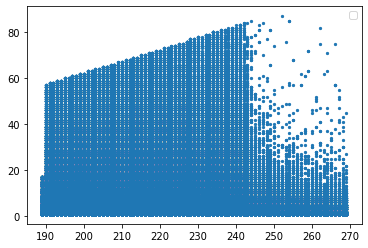

No handles with labels found to put in legend.


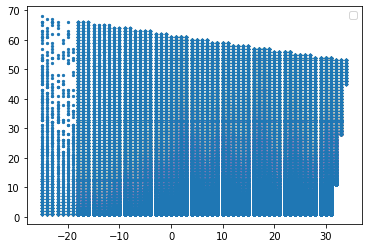

No handles with labels found to put in legend.


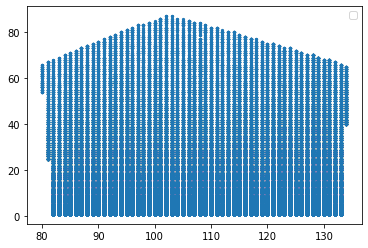

No handles with labels found to put in legend.


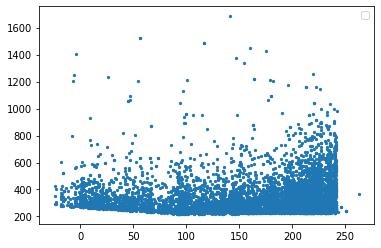

No handles with labels found to put in legend.


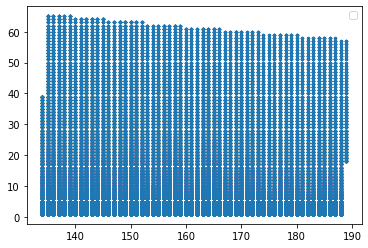

No handles with labels found to put in legend.


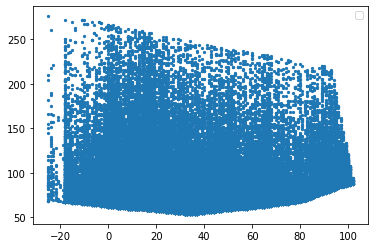

No handles with labels found to put in legend.


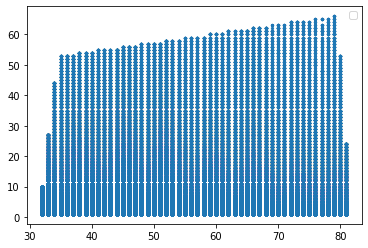

No handles with labels found to put in legend.


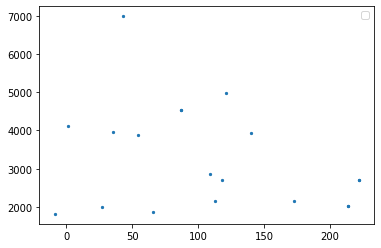

No handles with labels found to put in legend.


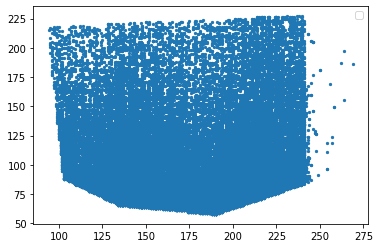

In [20]:
#K-means
kmeans=KMeans(n_clusters= 9, algorithm='full')
deal_with = ordered[['date', 'sum_click']].values
Y_Kmeans = kmeans.fit_predict(deal_with)
u_labels = np.unique(Y_Kmeans)
for i in u_labels:
    plt.scatter(deal_with[Y_Kmeans == i , 0] , deal_with[Y_Kmeans == i , 1], s = 5)
    plt.legend()
    plt.show()